In [29]:
import os
import numpy as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk

plt.style.use('ggplot')

In [30]:
# Read data
df = pd.read_json("hf://datasets/Amod/mental_health_counseling_conversations/combined_dataset.json", lines=True)
df.head()

,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...


In [31]:
df.shape

(3512, 2)

In [32]:
df.describe()

,Context,Response
count,3512,3512
unique,995,2480
top,I have so many issues to address. I have a his...,
freq,94,4


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Context   3512 non-null   object
 1   Response  3512 non-null   object
dtypes: object(2)
memory usage: 55.0+ KB


In [34]:
df.isnull().sum()

Context     0
Response    0
dtype: int64

In [35]:
df['Response'].duplicated().sum()

1032

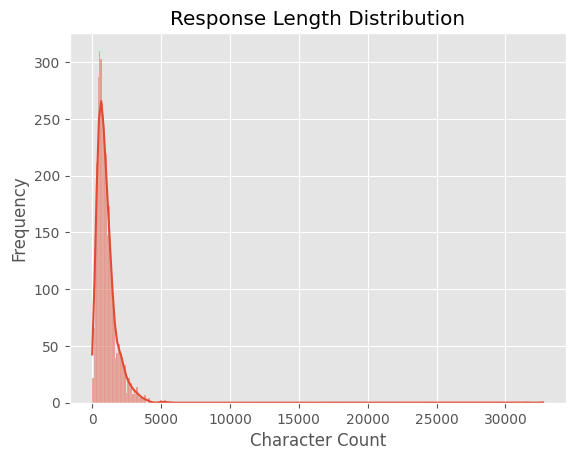

In [36]:
df['response_length'] = df['Response'].apply(len)
sns.histplot(df['response_length'], kde=True)
plt.title('Response Length Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

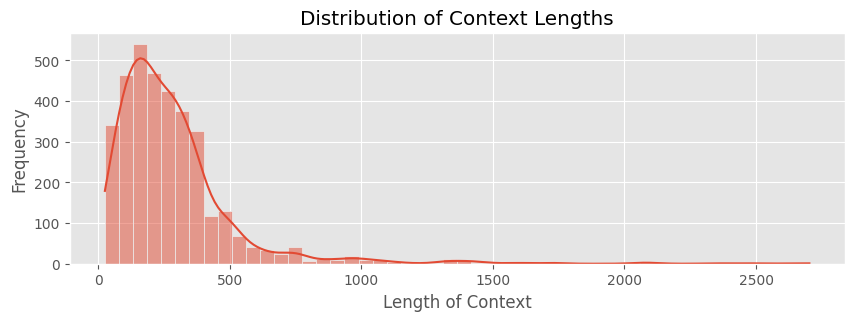

In [37]:
df['Context_length'] = df['Context'].apply(len)
plt.figure(figsize=(10, 3))
sns.histplot(df['Context_length'], bins=50, kde=True)
plt.title("Distribution of Context Lengths")
plt.xlabel("Length of Context")
plt.ylabel("Frequency")
plt.show()

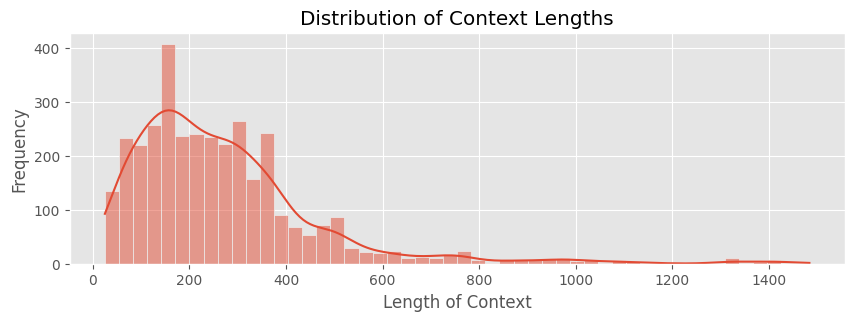

In [38]:
filtered_df = df[df['Context_length'] <= 1500]

context_len = filtered_df['Context'].apply(len)

plt.figure(figsize=(10, 3))
sns.histplot(context_len, bins=50, kde=True)
plt.title("Distribution of Context Lengths")
plt.xlabel("Length of Context")
plt.ylabel("Frequency")
plt.show()

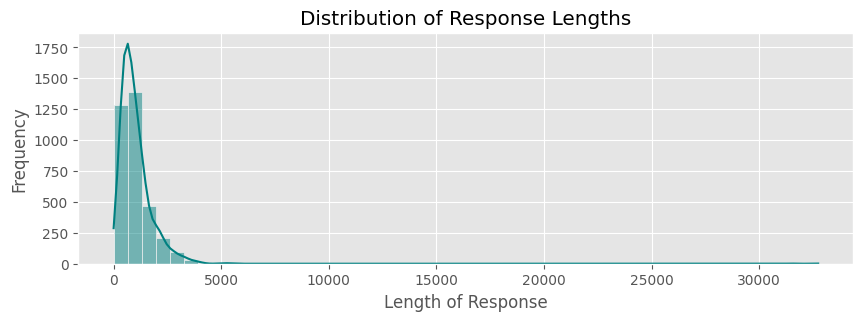

In [39]:
response_length = filtered_df['Response'].apply(len)

plt.figure(figsize=(10, 3))
sns.histplot(response_length, bins=50, kde=True, color="teal")
plt.title("Distribution of Response Lengths")
plt.xlabel("Length of Response")
plt.ylabel("Frequency")
plt.show()

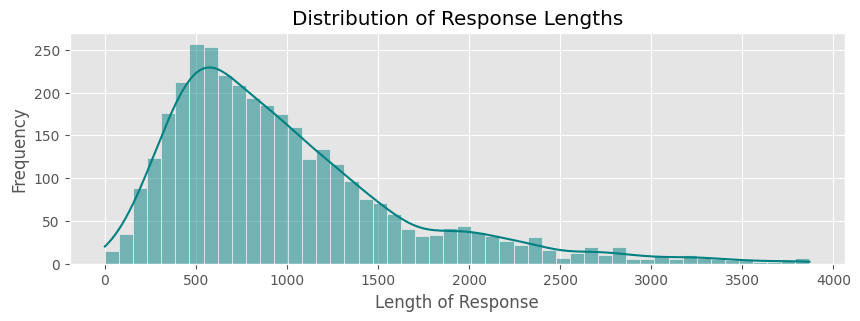

In [40]:
filtered_df = filtered_df[response_length <= 4000]

response_length = filtered_df['Response'].apply(len)
plt.figure(figsize=(10, 3))
sns.histplot(response_length, bins=50, kde=True, color="teal")
plt.title("Distribution of Response Lengths")
plt.xlabel("Length of Response")
plt.ylabel("Frequency")
plt.show()

In [ ]:
filtered_df.to_json("filtered_data.json", orient="records", lines=True)

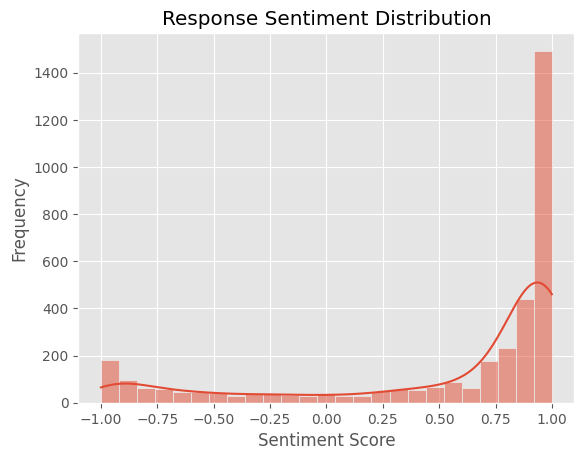

In [41]:
# nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['Response'].apply(lambda x: sia.polarity_scores(x)['compound'])

sns.histplot(df['sentiment'], kde=True)
plt.title('Response Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [42]:
tfidf = TfidfVectorizer().fit_transform(df['Response'])
similarity_matrix = cosine_similarity(tfidf)

print(similarity_matrix)

[[1.         0.25104996 0.18237059 ... 0.12546391 0.14276123 0.01295465]
 [0.25104996 1.         0.20857322 ... 0.1986742  0.19682395 0.04138586]
 [0.18237059 0.20857322 1.         ... 0.09762697 0.14898683 0.01134238]
 ...
 [0.12546391 0.1986742  0.09762697 ... 1.         0.11770915 0.05275828]
 [0.14276123 0.19682395 0.14898683 ... 0.11770915 1.         0.02060726]
 [0.01295465 0.04138586 0.01134238 ... 0.05275828 0.02060726 1.        ]]
